# 2017年基礎実験
## Jupyter Notebook を使った大規模データの可視化

本実験では、Jupyter Notebook を使って大規模データの可視化を行います。本実験で扱うデータは生物学実験で得られたデータではありませんが、数値データを可視化し俯瞰することは解析の基礎であり、どのようなデータであれ非常に大切なことです。

### Jupyter Notebook (IPython Notebook) とは
* Python という名のプログラミング言語が使えるプログラミング環境。計算コードと計算結果を同じ場所に時系列で保存できるので、実験系における実験ノートのように、いつどんな処理を行って何を得たのか記録して再現するのに便利。
* [当学の演習室での使い方](https://raw.githubusercontent.com/maskot1977/-/master/%E6%BC%94%E7%BF%92%E5%AE%A4.txt)
* [個人PCでのインストールと始め方](http://www.task-notes.com/entry/20151129/1448794509)
* [小寺研究室](https://github.com/maskot1977/-/blob/master/L1%E3%82%BC%E3%83%9F2015%E5%B0%8F%E5%AF%BA%E7%A0%94%E7%A9%B6%E5%AE%A4.pptx.pdf) では、MacOSX上で右記のようにセットアップしています。> [環境構築](https://sites.google.com/site/masaakikotera/8-python/8-1-huan-jing-gou-zhu)

### まずは、意味が分からなくてもいいので使ってみましょう
* Python にまだ慣れてない人は、[Pythonウォーミングアップ](http://nbviewer.jupyter.org/github/maskot1977/ipython_notebook/blob/master/Python%E3%82%A6%E3%82%A9%E3%83%BC%E3%83%9F%E3%83%B3%E3%82%AF%E3%82%99%E3%82%A2%E3%83%83%E3%83%95%E3%82%9A.ipynb) に進んでください。

### 本実習スタート
* 本実習ではまず、下のプログラムを順次実行してもらいます。各自の画面中の IPython Notebook のセルに順次入力して（コピペ可）、「Shift + Enter」してください。
* 最後に、課題を解いてもらいます。課題の結果を、指定する方法で指定するメールアドレスまで送信してください。

In [12]:
# URL によるリソースへのアクセスを提供するライブラリをインポートする。
# import urllib # Python 2 の場合
import urllib.request # Python 3 の場合

In [19]:
# 図やグラフを図示するためのライブラリをインポートする。
import matplotlib.pyplot as plt
%matplotlib inline

### 簡単な折れ線グラフで時系列変化を図示する。
<blockquote>
データの説明：

__「商用航空会社マイレージ」__

1937年から1960年の各年の、合州国の商用航空会社の課税利用者マイル数 (<a href="http://www.is.titech.ac.jp/~mase/mase/html.jp/temp/airmiles.jp.html">詳細</a>)。

https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/airmiles.txt

</blockquote>

In [13]:
# ウェブ上のリソースを指定する
url = 'https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/airmiles.txt'
# 指定したURLからリソースをダウンロードし、名前をつける。
# urllib.urlretrieve(url, 'airmiles.txt') # Python 2 の場合
urllib.request.urlretrieve(url, 'airmiles.txt') # Python 3 の場合

('airmiles.txt', <http.client.HTTPMessage at 0x1084f3a58>)

In [14]:
# ダウンロードしたファイルの冒頭だけ表示して中身を確認する
for i, line in enumerate(open('airmiles.txt')):
    print(line),
    if i >= 5: break

1937	412

1938	480

1939	683

1940	1052

1941	1385

1942	1418



In [15]:
# ダウンロードしたファイルから、2つの列の数字をそれぞれリストに入れる。
x = []
y = []
for i, line in enumerate(open('airmiles.txt')):
    a = line.split()
    x.append(int(a[0]))
    y.append(int(a[1]))

In [16]:
# xの中身を確認する。
print(x)

[1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960]


In [17]:
# yの中身を確認する。
print(y)

[412, 480, 683, 1052, 1385, 1418, 1634, 2178, 3362, 5948, 6109, 5981, 6753, 8003, 10566, 12528, 14760, 16769, 19819, 22362, 25340, 25343, 29269, 30514]


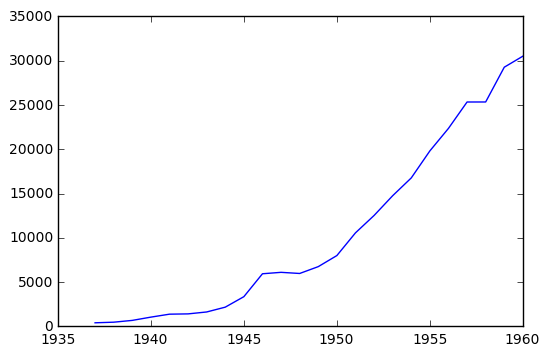

In [18]:
# とりあえず可視化してみる。
plt.plot(x,y)

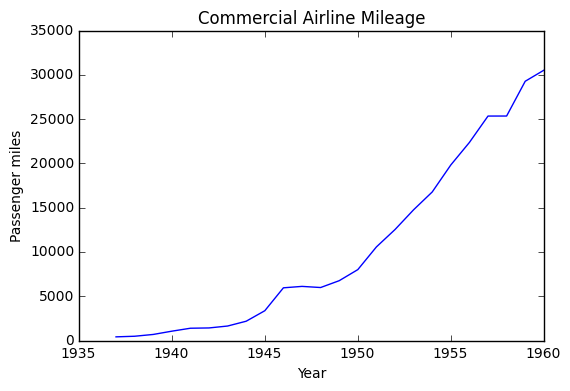

In [20]:
#もうちょっとカッコ良くする
plt.plot(x,y)
plt.title('Commercial Airline Mileage')
plt.xlabel('Year')
plt.ylabel('Passenger miles')
plt.show()

## 複数のデータの時系列を図示する
<blockquote>
データの説明：

__「ニューヨークの大気状態観測値」__

ニューヨークの大気状態観測値。1973 年の五月から九月。 (<a href="http://www.is.titech.ac.jp/~mase/mase/html.jp/temp/airquality.jp.html">詳細</a>)。

https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/airquality.txt

<ul>
<li>Ozone: Roosevelt 島における 1300 時から 1500 時までの 平均オゾン量 (parts per billion 単位)。
<li>Solar: セントラルパークにおける 0800 時から 1200 時 の周波数 4000～7700 オングストロームの日射量 (単位 Langleys)。
<li>Wind: La Guardia 空港における毎日の 0700 時から 10000 時の 平均風速 (単位 マイル)。
<li>Temp: La Guardia 空港における一日の最大温度 (単位 華氏)。
</ul>

</blockquote>

In [21]:
# ウェブ上のリソースを指定する
url = 'https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/airquality.txt'
# 指定したURLからリソースをダウンロードし、名前をつける。
# urllib.urlretrieve(url, 'airquality.txt') # Python 2 の場合
urllib.request.urlretrieve(url, 'airquality.txt') # Python 3 の場合

('airquality.txt', <http.client.HTTPMessage at 0x108878c88>)

In [22]:
# ダウンロードしたファイルの冒頭だけ表示して中身を確認する
for i, line in enumerate(open('airquality.txt')):
    print(line),
    if i >= 5: break

	Ozone	Solar.R	Wind	Temp	Month	Day

1	41	190	7.4	67	5	1

2	36	118	8	72	5	2

3	12	149	12.6	74	5	3

4	18	313	11.5	62	5	4

5	NA	NA	14.3	56	5	5



In [23]:
# ダウンロードしたファイルから、それぞれの列の数字をリストに入れる。日付の情報は日付のオブジェクトに変換してリストに入れる。
import datetime
ozone = []
solar = []
wind = []
temp = []
date = []
for i, line in enumerate(open('airquality.txt')):
    if i == 0:
        continue
    else:
        a = line.split()
        if 'NA' in a:
            continue
        ozone.append(int(a[1]))
        solar.append(int(a[2]))
        wind.append(float(a[3]))
        temp.append(int(a[4]))
        month = int(a[5])
        day = int(a[6])
        date.append(datetime.datetime(1973, month, day))

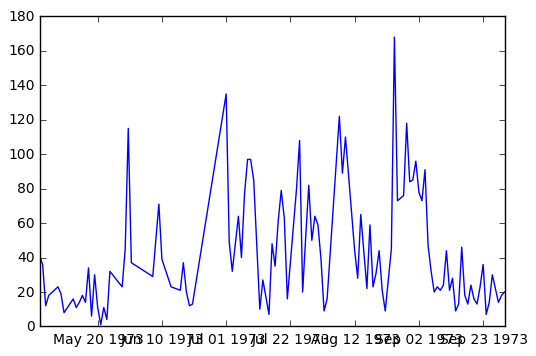

In [24]:
# まずは一種類のデータだけ図示してみる。
plt.plot(date, ozone)

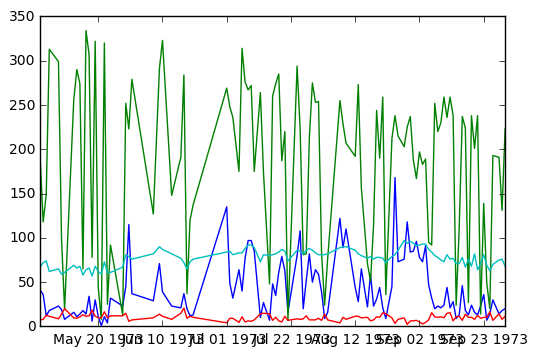

In [25]:
# すべてのデータを図示してみる。
plt.plot(date, ozone)
plt.plot(date, solar)
plt.plot(date, wind)
plt.plot(date, temp)
plt.show()

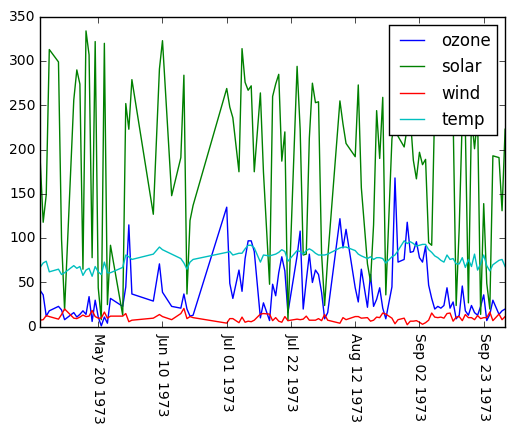

In [26]:
# もうちょっとカッコよくしてみる。
plt.plot(date, ozone, label='ozone')
plt.plot(date, solar, label='solar')
plt.plot(date, wind, label='wind')
plt.plot(date, temp, label='temp')
plt.legend()
plt.xticks(rotation=270)
plt.show()

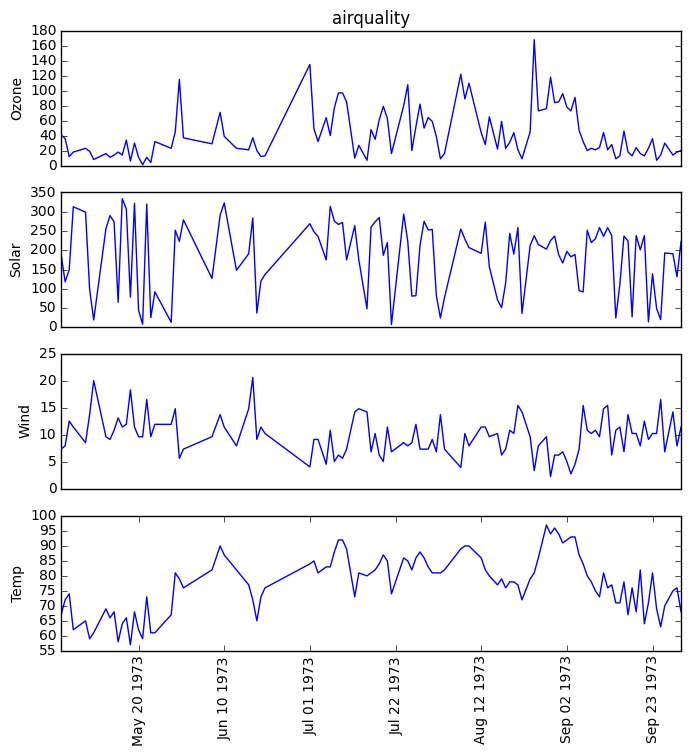

In [27]:
# さらに見やすくしてみる
plt.figure(figsize=(8, 8))

plt.subplot(4, 1, 1)
plt.plot(date, ozone)
plt.title('airquality')
plt.xticks([])
plt.ylabel('Ozone')

plt.subplot(4, 1, 2)
plt.plot(date, solar)
plt.xticks([])
plt.ylabel('Solar')

plt.subplot(4, 1, 3)
plt.plot(date, wind)
plt.xticks([])
plt.ylabel('Wind')

plt.subplot(4, 1, 4)
plt.plot(date, temp)
plt.xticks(rotation=90)
plt.ylabel('Temp')

### ヒストグラムを作成する

(array([ 27.,  33.,  19.,   8.,  10.,   7.,   3.,   2.,   1.,   1.]),
 array([   1. ,   17.7,   34.4,   51.1,   67.8,   84.5,  101.2,  117.9,
         134.6,  151.3,  168. ]),
 <a list of 10 Patch objects>)

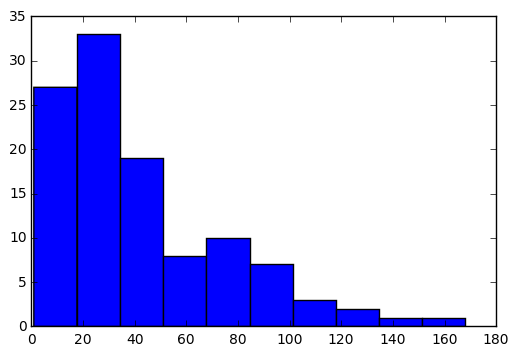

In [28]:
plt.hist(ozone)

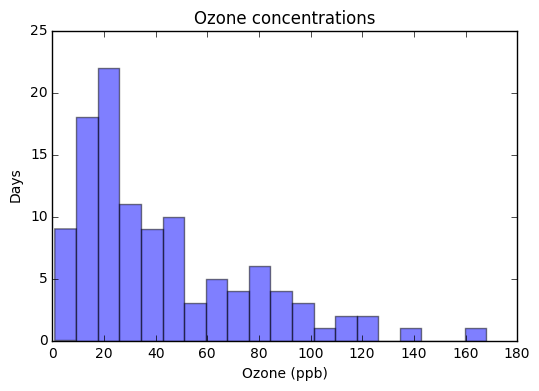

In [29]:
#もう少しカッコ良くする
plt.hist(ozone, bins=20, alpha=0.5)
plt.title('Ozone concentrations')
plt.xlabel('Ozone (ppb)')
plt.ylabel('Days')
plt.show()

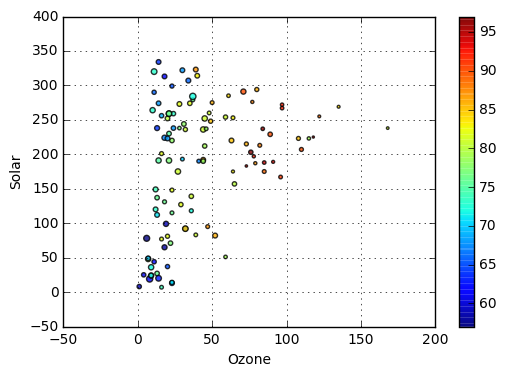

In [30]:
# ノード（点）のサイズや色に意味をもたせた散布図を作成する
x_axis, x_label = ozone, "Ozone"
y_axis, y_label = solar, "Solar"
sizes, size_label = wind, "Wind"
colors, color_label = temp, "Temp"

plt.scatter(x_axis, y_axis, s=sizes, c=colors, alpha=0.8)
plt.colorbar(alpha=0.8)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.grid()
plt.show()

### Scatter Matrix でデータの全体像を眺めてみましょう。
（本来は、最初にやるべきことですが、、、）

In [31]:
import pandas as pd # データフレームワーク処理のライブラリをインポート
from pandas.tools import plotting # 高度なプロットを行うツールのインポート

In [32]:
df = pd.read_csv('airquality.txt', sep='\t', na_values=".") # データの読み込み

In [33]:
pd.DataFrame(df).head() # 先頭N行を表示する。カラムのタイトルも確認する。

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day
0,1,41,190,7.4,67,5,1
1,2,36,118,8.0,72,5,2
2,3,12,149,12.6,74,5,3
3,4,18,313,11.5,62,5,4
4,5,NaN,NaN,14.3,56,5,5


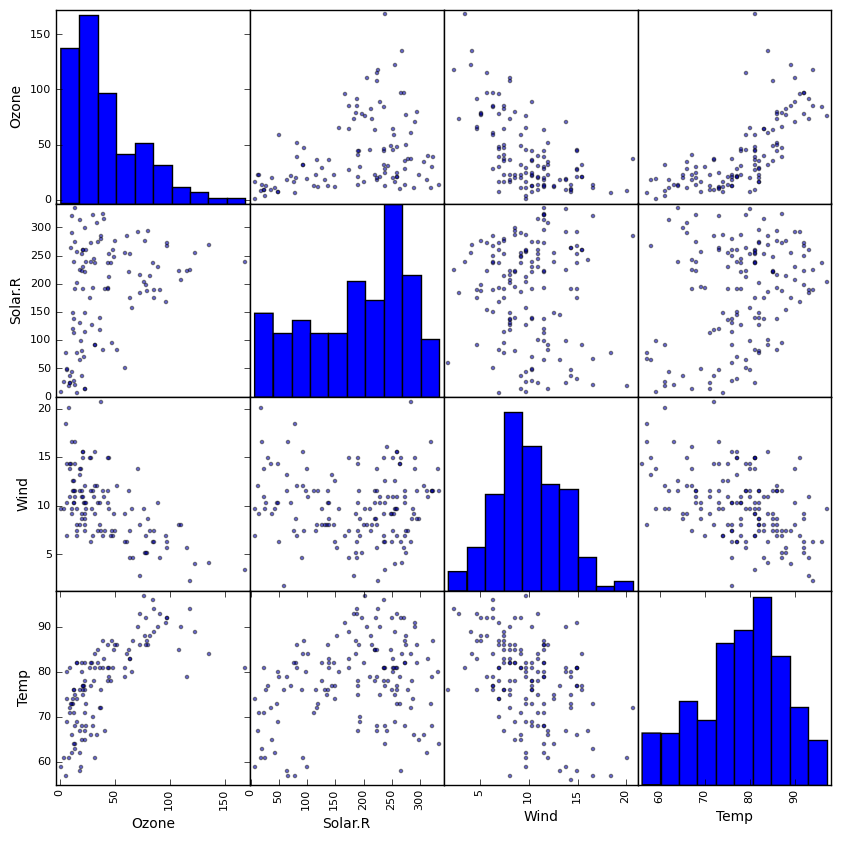

In [34]:
# 下記の関数にカラム名を入力すれば、Scatter Matrix が表示されます。
plotting.scatter_matrix(df[['Ozone', 'Solar.R', 'Wind', 'Temp']], figsize=(10, 10)) 
plt.show()

## 別のデータについても同様に解析してみましょう
<blockquote>
データの説明：

__「合州国の州別暴力犯罪率」__

このデータセットは 1973 年の合州国の 50 の州毎の、住民10万人あたりの暴行、殺人、そして強姦による 逮捕数を含む。また都市部人口の割合が与えられている。
 (<a href="http://www.is.titech.ac.jp/~mase/mase/html.jp/temp/USArrests.jp.html">詳細</a>)。

https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/USArrests.txt

<ul>
<li>Murder:	殺人による逮捕（10万あたり）
<li>Assault:	暴行による逮捕（10万あたり）
<li>UrbanPop:	都市部人口比率
<li>Rape:	強姦による逮捕（10万あたり）
</ul>

</blockquote>

In [35]:
url = 'https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/USArrests.txt'
# 指定したURLからリソースをダウンロードし、名前をつける。
# urllib.urlretrieve(url, 'USArrests.txt') # Python 2 の場合
urllib.request.urlretrieve(url, 'USArrests.txt') # Python 3 の場合

('USArrests.txt', <http.client.HTTPMessage at 0x108dfa198>)

In [38]:
df = pd.read_csv('USArrests.txt', sep='\t', na_values=".") # データの読み込み

In [39]:
pd.DataFrame(df).head() # 先頭N行を表示する。カラムのタイトルも確認する。

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


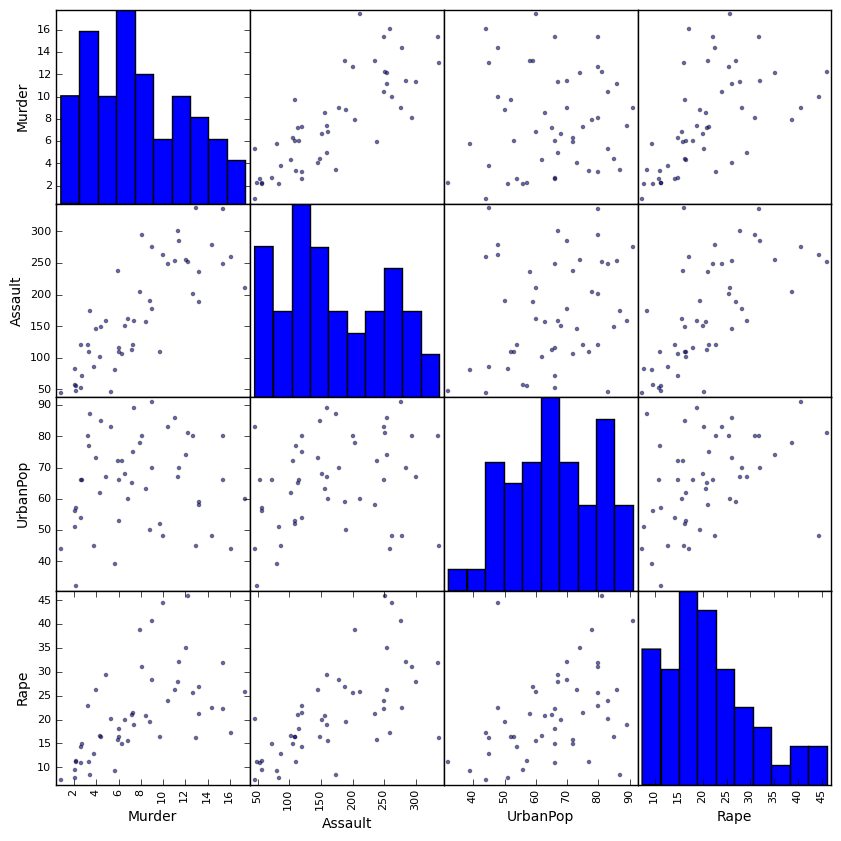

In [40]:
# 下記の関数にカラム名を入力すれば、Scatter Matrix が表示されます。
plotting.scatter_matrix(df[['Murder', 'Assault', 'UrbanPop', 'Rape']], figsize=(10, 10)) 
plt.show()

In [36]:
# ダウンロードしたファイルから、2つの列の数字をそれぞれ４つのリストに入れる。
import datetime
state = []
murder = []
assault = []
urbanpop = []
rape = []
for i, line in enumerate(open('USArrests.txt')):
    if i == 0:
        continue
    else:
        a = line.split('\t')
        state.append(a[0])
        murder.append(float(a[1]))
        assault.append(int(a[2]))
        urbanpop.append(int(a[3]))
        rape.append(float(a[4]))

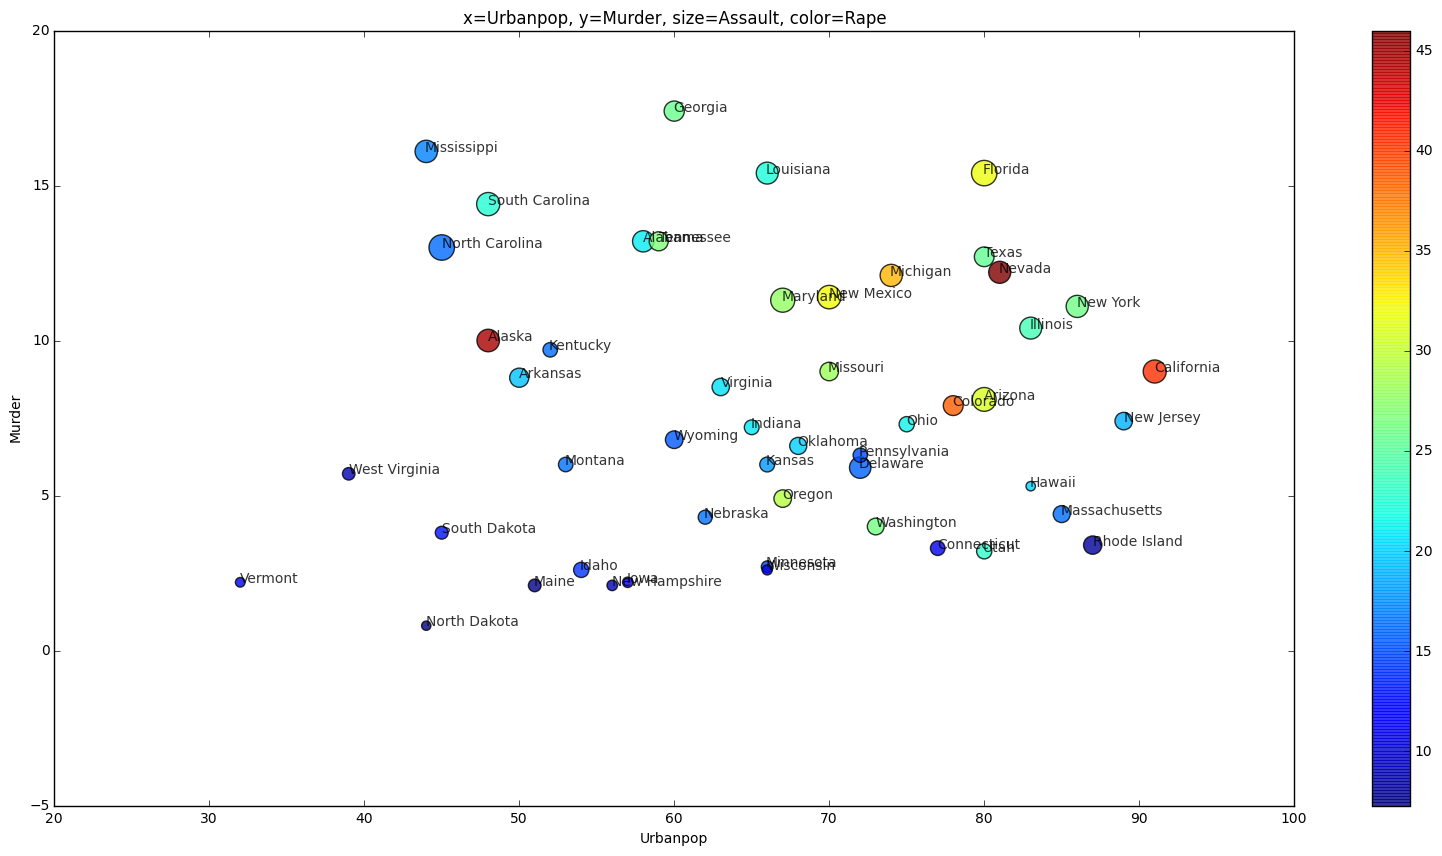

In [37]:
# ノード（点）のサイズや色に意味をもたせた散布図を作成する
names = state
x_axis = urbanpop
y_axis = murder
sizes = assault
colors = rape

name_label = "States"
x_label = "Urbanpop"
y_label = "Murder"
size_label = "Assault"
color_label = "Rape"

plt.figure(figsize=(20, 10))
for x, y, name in zip(x_axis, y_axis, names):
    plt.text(x, y, name, alpha=0.8, size=10)
plt.scatter(x_axis, y_axis, s=sizes, c=colors, alpha=0.8)
plt.colorbar(alpha=0.8)
plt.title("x=%s, y=%s, size=%s, color=%s" % (x_label, y_label, size_label, color_label))
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.show()

## また別のデータ

<blockquote>
データの説明：

__「新国民生活指標データ」__

都道府県の豊かさを表すために，経済企画庁が策定した新国民生活指標の「住む」ことに関する平成11年の発表データ。
 (<a href="http://mo161.soci.ous.ac.jp/@d/DoDStat/PLIlive/PLIlive_dataJ.xml">詳細</a>)。

https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/PLIlive_dataJ.txt

<ul>
<li>1	Pref	都道府県	都道府県	
<li>2	NonRep	危険住宅	危険・修理不能住宅比率(%)	
<li>3	OverMin	最低居住	最低居住水準以上住宅比率(%)	
<li>4	Rent	借家家賃	借家の1畳当たり実質家賃(円)	
<li>5	HomeOwn	持家比率	持家比率(%)	
<li>6	CompPol	公害苦情	公害苦情受理件数(人口十万人比)[-]	
<li>7	NumClime	重要犯罪	重要刑法犯罪認知件数(人口十万人比)[-]	
<li>8	NumLarc	重要窃盗	重要窃盗犯認知件数(人口十万人比)[-]	
<li>9	TrafAcci	交通事故	交通事故発生件数(人口十万人比)[-]	
<li>10	Fire	建物火災	建物火災出火件数(住宅十万戸比)[-]	
<li>11	DspRubb	ごみ処理率	ごみ衛生処理率(%)	
<li>12	Sidewalk	歩道設置率	一般道路歩道設置率(%)	
<li>13	MedFacil	医療機関	最寄りの医療機関までの距離500ｍ未満住宅比率(%)	
<li>14	OverOrd	居住水準	誘導居住水準以上住宅比率(%)	
<li>15	Sunshine	日照時間	日照時間5時間以上住宅比率(%)
<li>16	NumMat	畳数	1人当たり畳数(畳)	
<li>17	AreaResi	敷地面積	1住宅当たり敷地面積(m2)	
<li>18	Transpt	交通機関	最寄りの交通機関1km未満住宅比率(%)	
<li>19	AreaPark	公園面積	1人当たり公園面積(m2)	
<li>20	Sewarage	下水普及率	下水道等普及率(%)	
<li>21	Recycle	リサイクル率	リサイクル率(%)	
<li>22	AmtRubb	ごみ排出量	1人1日当たりごみ排出量(g)[-]	
<li>23	AvgMin	通勤通学時間	通勤・通学平均時間(分)[-]	
<li>24	Pavement	道路舗装率	一般道路舗装率(%)
</ul>

</blockquote>

# 課題

講義時間中に、以下の課題を指定されたメールアドレスまで送信してください。メールタイトルは「2017基礎実験」とし、学籍番号と氏名を明記すること。

__課題１__：「ニューヨークの大気状態観測値」のデータを解析して、結果をまとめ、その結果を解釈してださい。

__課題２__：「合州国の州別暴力犯罪率」のデータを解析して、結果をまとめ、その結果を解釈してださい。

__課題３__：「新国民生活指標データ」のデータを解析して、結果をまとめ、その結果を解釈してださい。

また、この実験に関して感想などがありましたら書いてくださると嬉しいです。今後の講義や実験などの改善につながるかもしれません。